Player Name: Player aame <br>
Salary: Salary in US dollars <br>
Position: Position played <br>
Age: Age of player <br> 
Team: Team(s) played for in 2022-23 season <br>
GP: Games played<br>
GS: Games started<br>
MP: Minutes per game<br>
FG: Field goals made per game<br>
FGA: Field goal attempts per game<br>
FG%: Field goal percentage<br>
3P: Three point filed goals made per game<br>
3PA: Three point field goal attempts per game<br>
3P%: Three point percentage<br>
2P: Two point field goals made per game<br>
2PA: Two point field goal attempts per game<br>
2P%: Two point percetage<br>
eFG%: Effective field goal percentage<br>
FT: Free throws made per game<br>
FTA: Free throw attempts per game<br>
FT%: Free throw percentage <br>
ORB: Offensive rebounds per game<br>
DRB: Defensive rebounds per game<br>
TRB: Total rebounds per game<br>
AST: Assists per game<br>
STL: Steals per game<br>
BLK: Blocks per game<br>
TOV: Turnovers per game<br>
PF: Personal fouls per game<br>
PTS: Points per game<br>
Player-additional: unique values<br>

In [197]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('nba_salaries.csv')

In [12]:
df = df.drop('Unnamed: 0', axis=1)

In [13]:
df.head()

Player Name    Salary Position  Age     Team  GP  GS    MP    FG  \
0      Stephen Curry  48070014       PG   34      GSW  56  56  34.7  10.0   
1          John Wall  47345760       PG   32      LAC  34   3  22.2   4.1   
2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24  29.1   5.9   
3       LeBron James  44474988       PF   38      LAL  55  54  35.5  11.1   
4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47  35.6  10.3   

    FGA  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional  
0  20.2  ...  0.7  5.4  6.1  6.3  0.9  0.4  3.2  2.1  29.4          curryst01  
1   9.9  ...  0.4  2.3  2.7  5.2  0.8  0.4  2.4  1.7  11.4           walljo01  
2  13.6  ...  1.2  4.6  5.8  7.5  1.0  0.5  3.5  2.2  15.9          westbru01  
3  22.2  ...  1.2  7.1  8.3  6.8  0.9  0.6  3.2  1.6  28.9          jamesle01  
4  18.3  ...  0.4  6.3  6.7  5.0  0.7  1.4  3.3  2.1  29.1          duranke01  

[5 rows x 31 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player Name        467 non-null    object 
 1   Salary             467 non-null    int64  
 2   Position           467 non-null    object 
 3   Age                467 non-null    int64  
 4   Team               467 non-null    object 
 5   GP                 467 non-null    int64  
 6   GS                 467 non-null    int64  
 7   MP                 467 non-null    float64
 8   FG                 467 non-null    float64
 9   FGA                467 non-null    float64
 10  FG%                466 non-null    float64
 11  3P                 467 non-null    float64
 12  3PA                467 non-null    float64
 13  3P%                454 non-null    float64
 14  2P                 467 non-null    float64
 15  2PA                467 non-null    float64
 16  2P%                463 non

In [16]:
df.describe()

Salary         Age          GP          GS          MP  \
count  4.670000e+02  467.000000  467.000000  467.000000  467.000000   
mean   8.416599e+06   25.820128   48.233405   22.650964   19.871306   
std    1.070812e+07    4.275113   24.807740   27.094577    9.548684   
min    5.849000e+03   19.000000    1.000000    0.000000    1.800000   
25%    1.782621e+06   23.000000   31.000000    1.000000   12.500000   
50%    3.722040e+06   25.000000   55.000000    8.000000   19.200000   
75%    1.063354e+07   29.000000   68.500000   45.500000   28.300000   
max    4.807001e+07   42.000000   83.000000   83.000000   41.000000   

               FG         FGA         FG%          3P         3PA  ...  \
count  467.000000  467.000000  466.000000  467.000000  467.000000  ...   
mean     3.351392    7.117773    0.465009    0.996574    2.792719  ...   
std      2.457836    5.020700    0.109547    0.880468    2.260794  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      1.600000    3.300000    0.417000    0.300000    1.000000  ...   
50%      2.700000    5.800000    0.455000    0.800000    2.400000  ...   
75%      4.300000    9.400000    0.507500    1.500000    4.150000  ...   
max     11.200000   22.200000    1.000000    4.900000   11.400000  ...   

              FT%         ORB         DRB         TRB         AST         STL  \
count  444.000000  467.000000  467.000000  467.000000  467.000000  467.000000   
mean     0.753489    0.866809    2.662099    3.528051    2.107709    0.610493   
std      0.148659    0.746976    1.707984    2.277160    1.957517    0.399083   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.691000    0.400000    1.400000    1.900000    0.800000    0.300000   
50%      0.769000    0.700000    2.300000    3.000000    1.400000    0.600000   
75%      0.844000    1.100000    3.500000    4.500000    2.900000    0.800000   
max      1.000000    5.100000    9.600000   12.500000   10.700000    3.000000   

              BLK         TOV          PF         PTS  
count  467.000000  467.000000  467.000000  467.000000  
mean     0.379015    1.114133    1.702784    9.129979  
std      0.364387    0.830051    0.776957    6.906006  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.100000    0.500000    1.200000    4.100000  
50%      0.300000    0.900000    1.700000    7.100000  
75%      0.500000    1.500000    2.200000   11.700000  
max      2.500000    4.100000    5.000000   33.100000  

[8 rows x 27 columns]

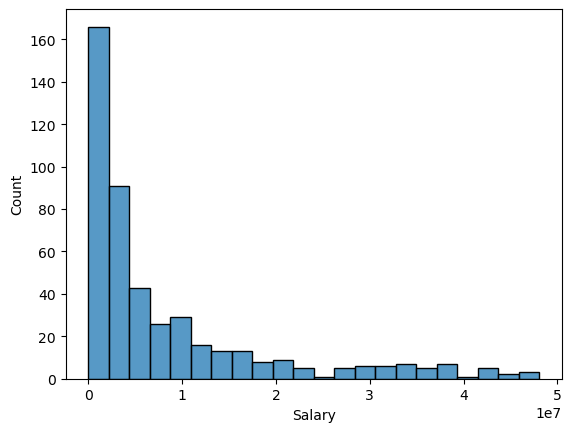

In [18]:
sns.histplot(data=df, x='Salary');

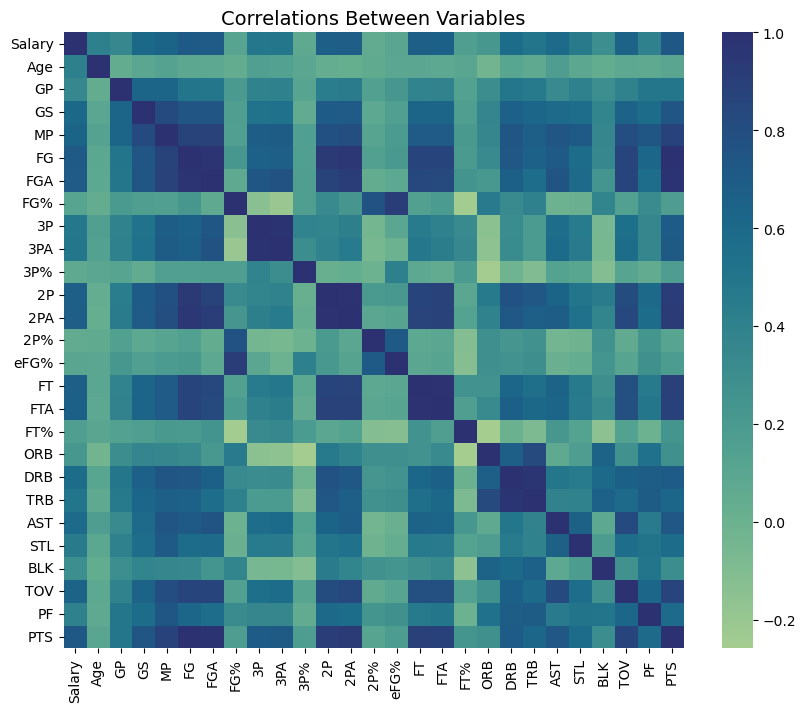

In [25]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),cmap='crest')
plt.title('Correlations Between Variables',size=14);

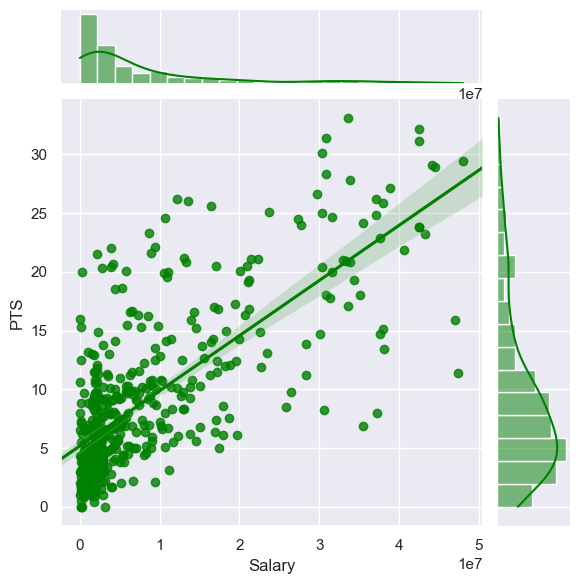

In [40]:
sns.set_theme(style='darkgrid')

sns.jointplot(x='Salary',y='PTS',data=df,kind='reg',truncate=False,color='green');

In [183]:
important_num_cols = list(df.corr()['Salary']
                          [(df.corr()['Salary'] > 0.50) | 
                           (df.corr()['Salary'] < -0.50)].index)

In [184]:
cat_cols = ['Position','Team']
important_cols = important_num_cols + cat_cols

In [185]:
df = df[important_cols]

In [186]:
df.head()

Salary  GS    MP    FG   FGA   2P   2PA   FT  FTA  DRB  TRB  AST  TOV  \
0  48070014  56  34.7  10.0  20.2  5.1   8.8  4.6  5.0  5.4  6.1  6.3  3.2   
1  47345760   3  22.2   4.1   9.9  3.1   6.7  2.3  3.3  2.3  2.7  5.2  2.4   
2  47080179  24  29.1   5.9  13.6  4.7   9.7  2.8  4.3  4.6  5.8  7.5  3.5   
3  44474988  54  35.5  11.1  22.2  8.9  15.3  4.6  5.9  7.1  8.3  6.8  3.2   
4  44119845  47  35.6  10.3  18.3  8.3  13.4  6.5  7.1  6.3  6.7  5.0  3.3   

    PTS Position     Team  
0  29.4       PG      GSW  
1  11.4       PG      LAC  
2  15.9       PG  LAL/LAC  
3  28.9       PF      LAL  
4  29.1       PF  BRK/PHO

In [158]:
print('Missing Values by Column')
print(df.isna().sum())

Missing Values by Column
Salary      0
GS          0
MP          0
FG          0
FGA         0
2P          0
2PA         0
FT          0
FTA         0
DRB         0
TRB         0
AST         0
TOV         0
PTS         0
Position    0
Team        0
dtype: int64


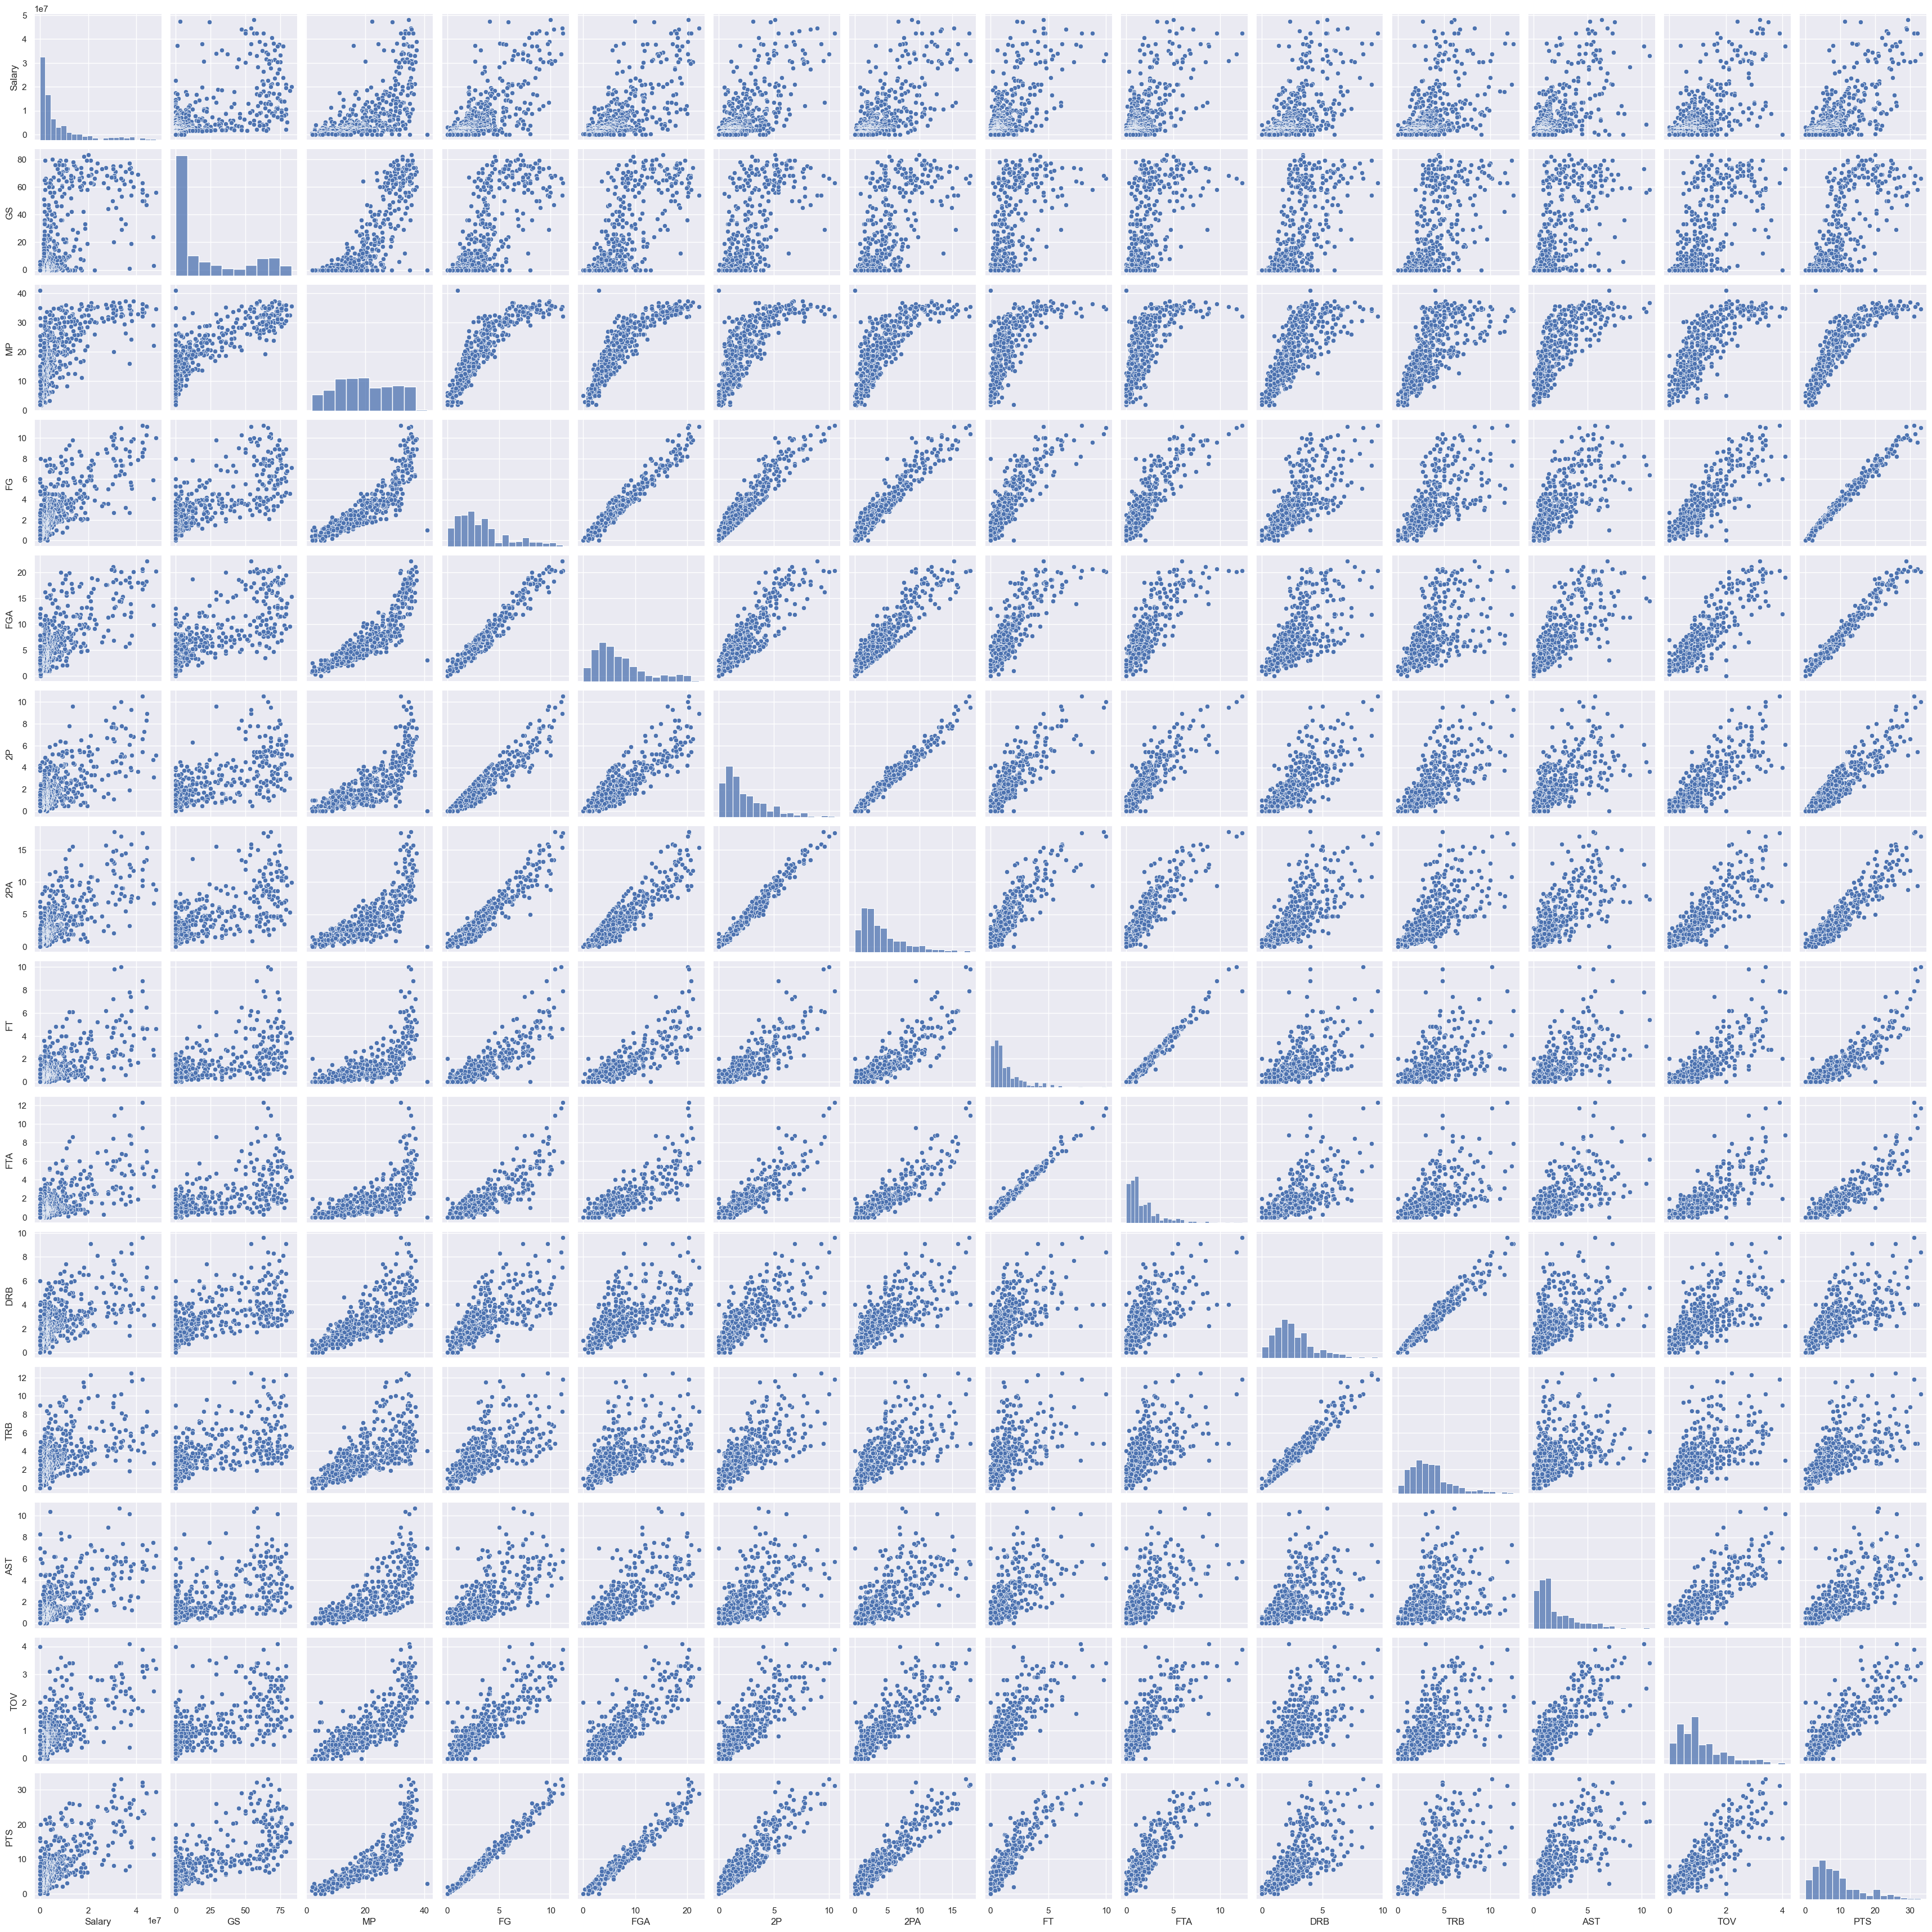

In [159]:
sns.pairplot(df[important_num_cols]);

<Figure size 600x600 with 0 Axes>

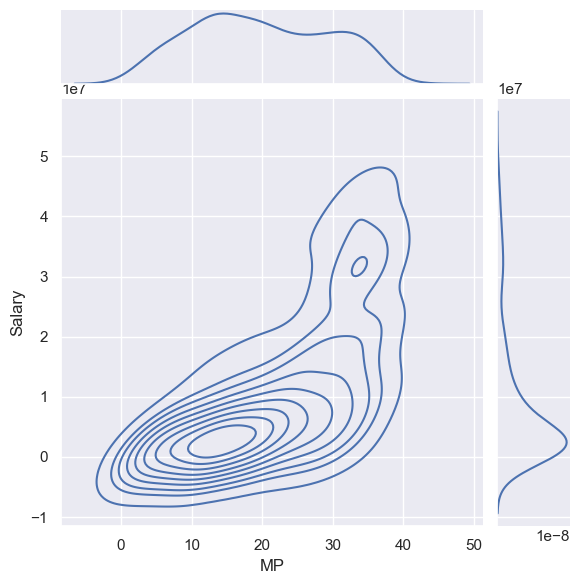

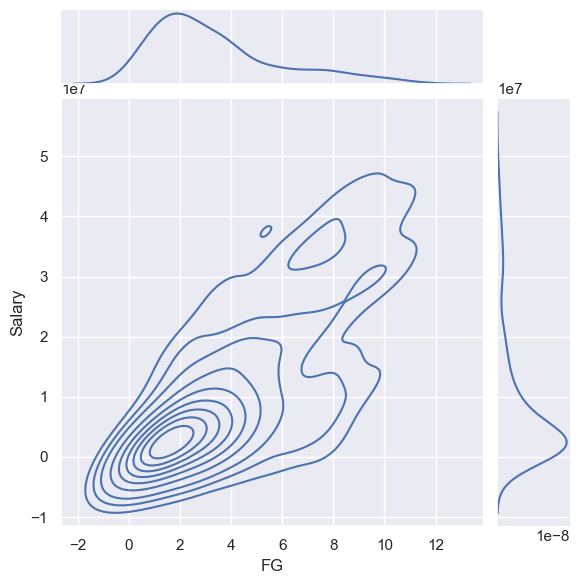

In [160]:
plt.figure(figsize=(6,6))
sns.jointplot(data=df,x='MP',y='Salary',kind='kde')
sns.jointplot(data=df,x='FG',y='Salary',kind='kde');

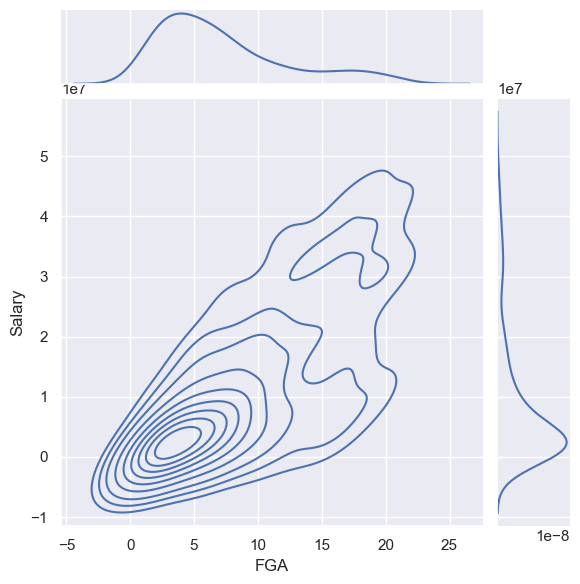

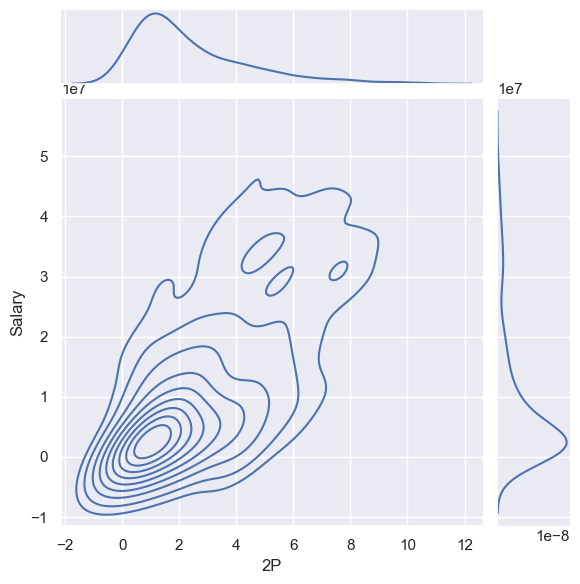

In [161]:
sns.jointplot(data=df,x='FGA',y='Salary',kind='kde')
sns.jointplot(data=df,x='2P',y='Salary',kind='kde');

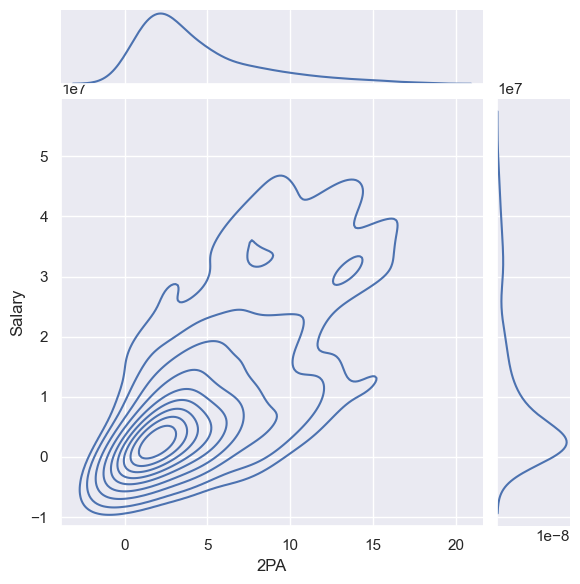

In [162]:
sns.jointplot(data=df,x='2PA',y='Salary',kind='kde')

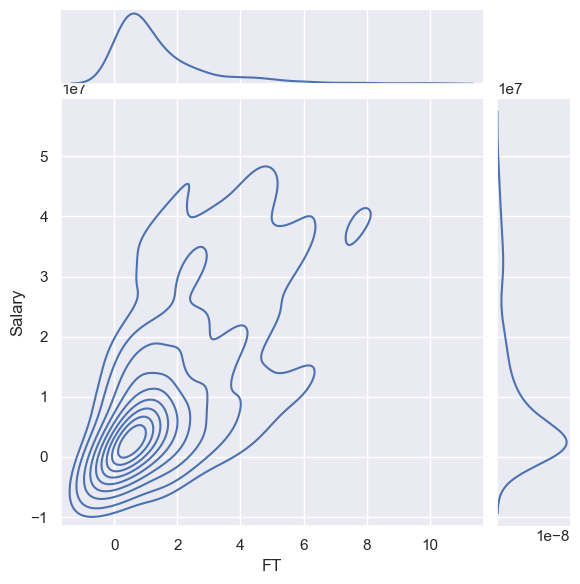

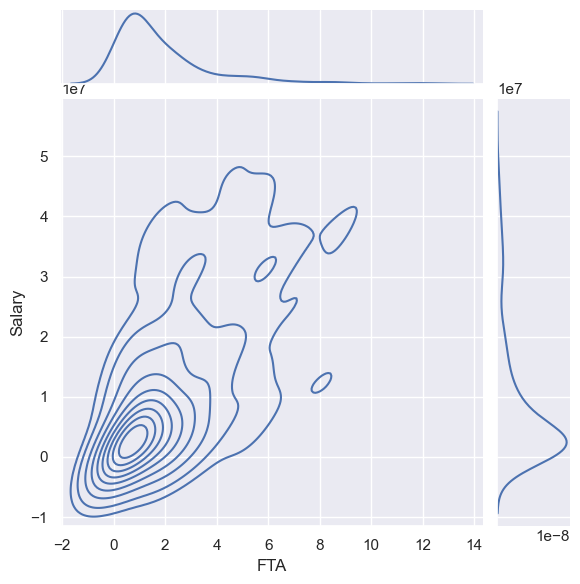

In [163]:
sns.jointplot(data=df,x='FT',y='Salary',kind='kde')
sns.jointplot(data=df,x='FTA',y='Salary',kind='kde');

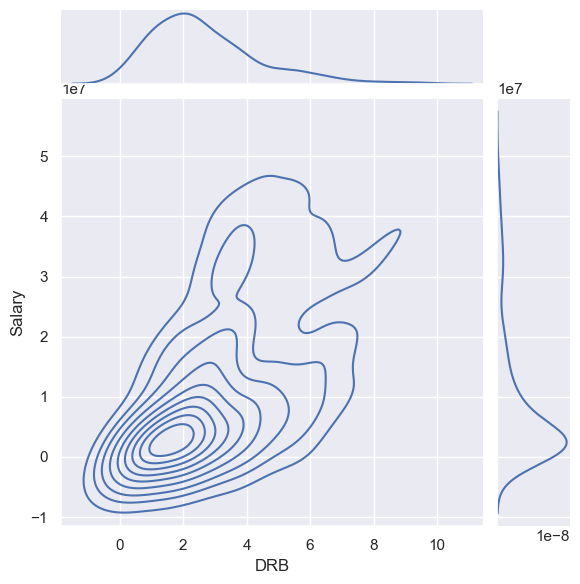

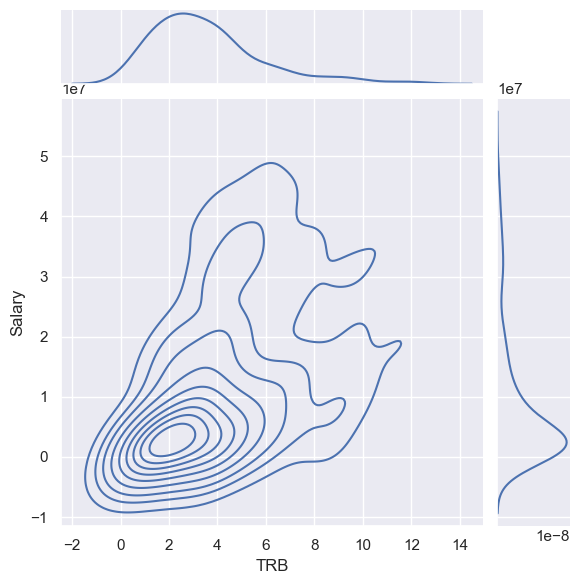

In [164]:
sns.jointplot(data=df,x='DRB',y='Salary',kind='kde')
sns.jointplot(data=df,x='TRB',y='Salary',kind='kde');

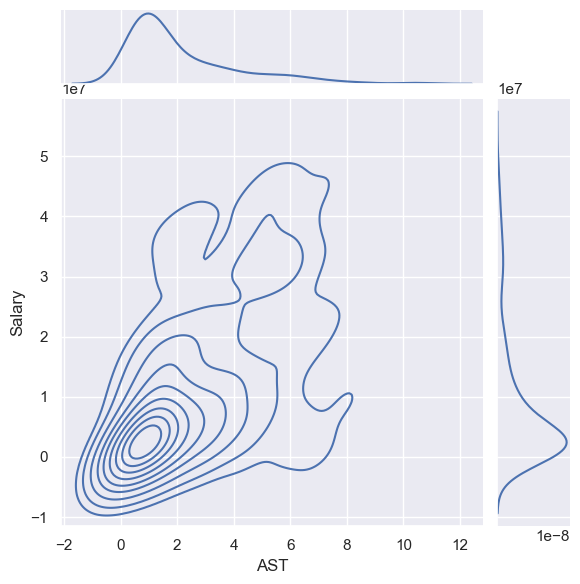

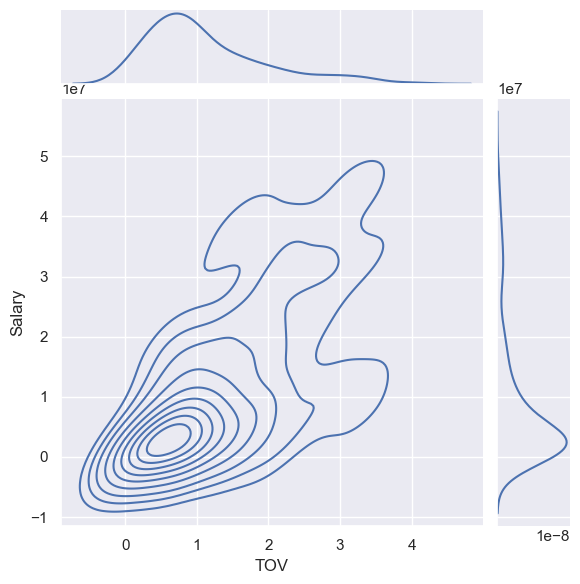

In [165]:
sns.jointplot(data=df,x='AST',y='Salary',kind='kde')
sns.jointplot(data=df,x='TOV',y='Salary',kind='kde');

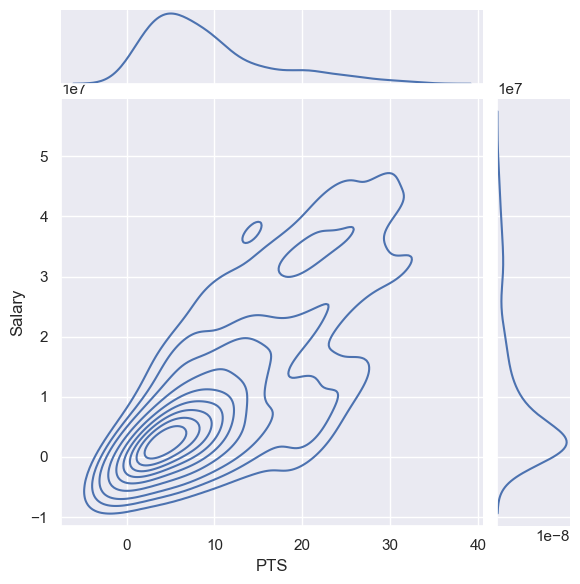

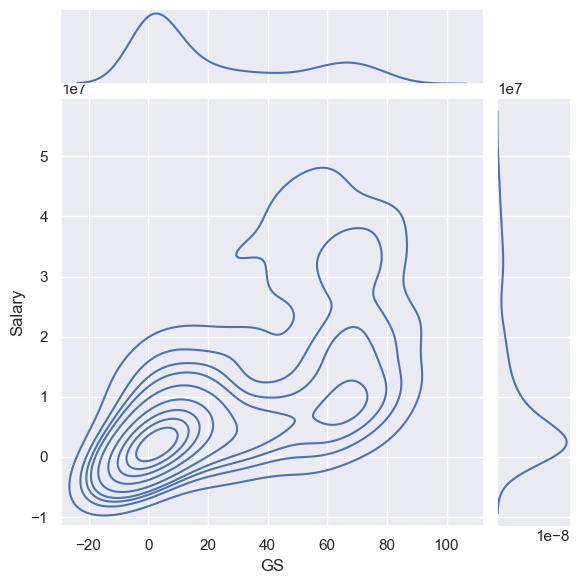

In [166]:
sns.jointplot(data=df,x='PTS',y='Salary',kind='kde')
sns.jointplot(data=df,x='GS',y='Salary',kind='kde');